In [3]:
import pandas as pd
import numpy as np
import datamol as dm

# Potency

In [4]:
import polaris as po

# Load the dataset from the Hub
dataset = po.load_dataset("asap-discovery/antiviral-potency-2025-unblinded")

# Get information on the dataset size


Output()

[2025-06-27 08:11:39] INFO     The version of Polaris that was used to create the artifact          ]8;id=821272;file:///Users/jenkescheen/projects/polaris/polaris/polaris/_artifact.py\_artifact.py]8;;\:]8;id=959777;file:///Users/jenkescheen/projects/polaris/polaris/polaris/_artifact.py#92\92]8;;\
                               (0.11.8.dev4+g40e3b2b.d20250207) is different from the currently                    
                               installed version of Polaris (0.11.7).                                              

                      WARNING  You're loading data from a remote location. If the dataset is small     ]8;id=376133;file:///Users/jenkescheen/projects/polaris/polaris/polaris/dataset/_base.py\_base.py]8;;\:]8;id=157907;file:///Users/jenkescheen/projects/polaris/polaris/polaris/dataset/_base.py#182\182]8;;\
                               enough, consider caching the dataset first using DatasetV2.cache() for              
                               more performant data access.                                                        

[08:11:40]  Success: Fetching dataset                                                                 ]8;id=998031;file:///Users/jenkescheen/projects/polaris/polaris/polaris/utils/context.py\context.py]8;;\:]8;id=702846;file:///Users/jenkescheen/projects/polaris/polaris/polaris/utils/context.py#53\53]8;;\

In [5]:
data = pd.DataFrame(dataset[:])

In [6]:
def set_created_time_bins(created_date):
    # given a date in yyyy-mm-dd format, set the generalized date
    if created_date.split("-")[0] == "2022":
        return "2022"
    elif created_date.split("-")[0] == "2023" or created_date.split("-")[0] == "2024": # for 2023 and 2024 just do Q1+2 or Q3+4
        if int(created_date.split("-")[1]) <= 6:
            return f"{created_date.split('-')[0]}Q1+2"
        else:
            return f"{created_date.split('-')[0]}Q3+4"
    else:
        raise ValueError(f"No compounds were synthesized in {created_date}")

In [7]:
asapid_creation_dict = {asapid: set_created_time_bins(created) for asapid, created in pd.read_csv("MERS-CoV-Mpro_potencies_CONFIDENTIAL.csv")[["Molecule Name", "Batch Created Date"]].values}
for asapid, created in pd.read_csv("SARS-CoV-2-Mpro_potencies_CONFIDENTIAL.csv")[["Molecule Name", "Batch Created Date"]].values:
    asapid_creation_dict[asapid] = set_created_time_bins(created)

In [8]:
test = data.query("Set == 'Test'")

In [9]:
# use default dict of list to group ids by date 
from collections import defaultdict
ids_by_date = defaultdict(list)
for asap_id, date in asapid_creation_dict.items():
    if asap_id in test["Molecule Name"].values:
        ids_by_date[date].append(asap_id)
ids_by_date

defaultdict(list,
            {'2024Q3+4': ['ASAP-0032604',
              'ASAP-0032605',
              'ASAP-0032562',
              'ASAP-0032546',
              'ASAP-0032572',
              'ASAP-0032559',
              'ASAP-0032560',
              'ASAP-0032561',
              'ASAP-0032312',
              'ASAP-0032340',
              'ASAP-0032364',
              'ASAP-0032406',
              'ASAP-0032402',
              'ASAP-0032386',
              'ASAP-0032358',
              'ASAP-0032403',
              'ASAP-0032332',
              'ASAP-0032327',
              'ASAP-0032326',
              'ASAP-0032325',
              'ASAP-0032322',
              'ASAP-0032328',
              'ASAP-0032289',
              'ASAP-0032279',
              'ASAP-0032280',
              'ASAP-0032282',
              'ASAP-0032285',
              'ASAP-0032242',
              'ASAP-0032292',
              'ASAP-0032300',
              'ASAP-0032271',
              'ASAP-0032278',
          

In [10]:
test = data.query("Set == 'Test'")

In [11]:
test["Molecule Name"]

1031    ASAP-0000175
1032    ASAP-0000272
1033    ASAP-0000528
1034    ASAP-0000541
1035    ASAP-0000733
            ...     
1323    ASAP-0032561
1324    ASAP-0032562
1325    ASAP-0032572
1326    ASAP-0032604
1327    ASAP-0032605
Name: Molecule Name, Length: 297, dtype: object

In [12]:
train = data.query("Set == 'Train'")
train

,CXSMILES,Molecule Name,Set,pIC50 (MERS-CoV Mpro),pIC50 (SARS-CoV-2 Mpro)
0,COC[C@]1(C)C(=O)N(C2=CN=CC3=CC=CC=C23)C(=O)N1C...,ASAP-0000141,Train,4.19,NaN
1,C=C(CN1CCC2=C(C=C(Cl)C=C2)C1C(=O)NC1=CN=CC2=CC...,ASAP-0000142,Train,4.92,5.29
2,CNC(=O)CN1C[C@]2(C[C@H](C)N(C3=CN=CC=C3C3CC3)C...,ASAP-0000143,Train,4.73,NaN
3,C=C(CN1CCC2=C(C=C(Cl)C=C2)C1C(=O)NC1=CN=CC2=CC...,ASAP-0000144,Train,4.90,6.11
4,C=C(CN1CCC2=C(C=C(Cl)C=C2)C1C(=O)NC1=CN=CC2=CC...,ASAP-0000145,Train,4.81,5.62
...,...,...,...,...,...
1026,CNS(=O)(=O)OCC(=O)N1CCN(CC2=CC=CC(Cl)=C2)[C@H]...,ASAP-0031916,Train,5.57,6.38
1027,O=C(CC1=CN=CC2=CC=CC=C12)N1CC[C@@H]2CCCC[C@H]2...,ASAP-0031917,Train,4.60,6.09
1028,CNC(=O)[C@H]1CCCN(C(=O)CC2=CN=CC3=CC=CC=C23)C1...,ASAP-0031918,Train,4.22,NaN
1029,C[C@H]1CCCN(C(=O)CC2=CN=CC3=CC=CC=C23)[C@H]1C ...,ASAP-0031920,Train,4.40,5.06


In [13]:
mols = np.array([dm.to_mol(smi) for smi in data["CXSMILES"]])
train_indices = data.index[data["Set"] == "Train"].tolist()
test_indices = data.index[data["Set"] == "Test"].tolist()


In [14]:
# get the distance from the training set to the test set
mat = dm.cdist(mols[test_indices], mols[train_indices])
mat.shape


(297, 1031)

In [15]:
# get the minimum distance from the training set to the test set
min_dist = mat.min(axis=1)
min_dist

array([0.23762376, 0.        , 0.53030303, 0.23469388, 0.        ,
       0.        , 0.22413793, 0.22413793, 0.        , 0.        ,
       0.17283951, 0.14      , 0.17475728, 0.17431193, 0.14018692,
       0.14141414, 0.26956522, 0.2038835 , 0.34615385, 0.12621359,
       0.17475728, 0.32432432, 0.26363636, 0.20535714, 0.31481481,
       0.26923077, 0.31192661, 0.19191919, 0.28571429, 0.14423077,
       0.1826087 , 0.1965812 , 0.23931624, 0.22222222, 0.25233645,
       0.22429907, 0.2       , 0.20833333, 0.17592593, 0.1509434 ,
       0.26363636, 0.20192308, 0.32      , 0.32      , 0.32      ,
       0.32      , 0.32      , 0.32      , 0.32      , 0.32      ,
       0.26605505, 0.23423423, 0.24509804, 0.22222222, 0.25233645,
       0.23853211, 0.22429907, 0.25      , 0.19811321, 0.23423423,
       0.25      , 0.22429907, 0.21698113, 0.26363636, 0.24390244,
       0.23966942, 0.27272727, 0.17355372, 0.23770492, 0.25233645,
       0.25925926, 0.23809524, 0.25925926, 0.23584906, 0.22222

In [16]:
y_true = {
    "pIC50 (MERS-CoV Mpro)": test["pIC50 (MERS-CoV Mpro)"].to_numpy(),
    "pIC50 (SARS-CoV-2 Mpro)": test["pIC50 (SARS-CoV-2 Mpro)"].to_numpy()
}

In [17]:
asap_id_to_distance = {}
for asap_ids in ids_by_date.values():
    for asap_id in asap_ids:
        index = test[test["Molecule Name"] == asap_id].index[0]
        dist = dm.cdist([mols[index]], mols[train_indices])
        min_dist = dist.min()
        asap_id_to_distance[asap_id] = min_dist
asap_id_to_distance


{'ASAP-0032604': 0.0,
 'ASAP-0032605': 0.0,
 'ASAP-0032562': 0.2894736842105263,
 'ASAP-0032546': 0.3253012048192771,
 'ASAP-0032572': 0.09230769230769231,
 'ASAP-0032559': 0.2894736842105263,
 'ASAP-0032560': 0.2894736842105263,
 'ASAP-0032561': 0.2894736842105263,
 'ASAP-0032312': 0.0,
 'ASAP-0032340': 0.2911392405063291,
 'ASAP-0032364': 0.39080459770114945,
 'ASAP-0032406': 0.35555555555555557,
 'ASAP-0032402': 0.09230769230769231,
 'ASAP-0032386': 0.2911392405063291,
 'ASAP-0032358': 0.36046511627906974,
 'ASAP-0032403': 0.09230769230769231,
 'ASAP-0032332': 0.12,
 'ASAP-0032327': 0.2625,
 'ASAP-0032326': 0.2625,
 'ASAP-0032325': 0.2625,
 'ASAP-0032322': 0.5113636363636364,
 'ASAP-0032328': 0.2625,
 'ASAP-0032289': 0.1232876712328767,
 'ASAP-0032279': 0.06153846153846154,
 'ASAP-0032280': 0.35365853658536583,
 'ASAP-0032282': 0.32142857142857145,
 'ASAP-0032285': 0.11688311688311688,
 'ASAP-0032242': 0.27692307692307694,
 'ASAP-0032292': 0.1232876712328767,
 'ASAP-0032300': 0.3253

In [18]:
sim_data = []
for date, asap_ids in ids_by_date.items():
    # if date == "2022": # let's just exclude altogher
    #     continue
    for asap_id in asap_ids:
        sim_data.append({
            "date": date,
            "distance": asap_id_to_distance[asap_id],
        })
sim_data = pd.DataFrame(sim_data).sort_values(by="date")

In [19]:
sim_data

,date,distance
296,2022,0.237624
289,2022,0.224138
290,2022,0.224138
291,2022,0.000000
295,2022,0.000000
...,...,...
91,2024Q3+4,0.256410
92,2024Q3+4,0.216216
93,2024Q3+4,0.000000
80,2024Q3+4,0.000000


In [20]:

from evaluation.potency import evaluate_potency_predictions, evaluate_all_potency_predictions

In [21]:
submissions = pd.read_json("./latest_competition_prediction.json")

In [22]:
def determine_subchallenge(data):
    sub = data["test"]
    if "Ligand Pose" in sub.keys():
        challenge = "Ligand Pose"
    elif "pIC50 (MERS-CoV Mpro)" and "pIC50 (SARS-CoV-2 Mpro)" in sub.keys():
        challenge = "Potency"
    elif "HLM" and "MLM" in sub.keys():
        challenge = "ADMET"
    else:
        raise ValueError()
    return challenge
        

In [23]:
submissions["subchallenge"] = submissions["predictions"].apply(determine_subchallenge)
submissions["predictions_unnested"] = submissions["predictions"].apply(lambda x: x["test"])

In [24]:
potency_submissions = submissions.query("subchallenge == 'Potency'")

In [25]:
for _, entry in potency_submissions.iterrows():
    print(entry["id"], entry["name"], "%%%", entry["description"], "%%%", entry["github_url"], "%%%", entry["report_url"], "\n")


competition-prediction-qg5PVWDLbiN5ndytwYPta BALM_potency_few_shot %%% BALM, few shot learning %%% None %%% https://github.com/meyresearch/polaris_challenge/tree/main 

competition-prediction-a9l9rEDGgw5wDcnMn3fud asapdiscovery_ml_gat %%% Predictions made by a GAT model trained using the asapdiscovery-ml pipeline. %%% https://github.com/kaminow/asap-polaris-challenge-potency-2025 %%% https://github.com/kaminow/asap-polaris-challenge-potency-2025/blob/main/report.md 

competition-prediction-JMFyxShsgcjYFnRzZQFFK potency-prediction %%% Predictions from potency-prediction-pipeline using RDKit descriptors %%% https://github.com/fulopjoz/polaris-antiviral-submission/blob/master/potency-submission/potency-prediction-pipeline.ipynb %%% https://tinyurl.com/dodo-potency 

competition-prediction-pr9pVVQedDD3mD0WXrWMg ucbbind %%% ucbbind first submission %%% https://github.com/KSUN63/Polaris-Submission %%% https://docs.google.com/document/d/1YVxVi-zMc7rX0TrvO7SIZfkQ-uUx3ChdtV4oovq80ts/edit?usp=sh

In [26]:
entry_categories = {
    "competition-prediction-qg5PVWDLbiN5ndytwYPta" : "GP", # Gaussian Process
    "competition-prediction-a9l9rEDGgw5wDcnMn3fud" : "DL", # Deep learning
    "competition-prediction-JMFyxShsgcjYFnRzZQFFK" : "ML", # shallow ML
    "competition-prediction-pr9pVVQedDD3mD0WXrWMg" : "DL", 
    "competition-prediction-ReoR53l5wBTRr6Py011Fn" : "LR", # linear regression
    "competition-prediction-LTj8nDyZE1cYCYaRzVols" : "DL",
    "competition-prediction-blnBskG8gooYdhc29wEuu" : "DL",
    "competition-prediction-Urln41KPESzYx2ao4tGbC" : "GP",
    "competition-prediction-wNi5FK6MaefmrF2LqbFr6" : "DL",
    "competition-prediction-u6GoQ1bnenK7gjAHUdmrb" : "GP",
    "competition-prediction-9Yrcg7omjLhpejG2mfZXp" : "DL",
    "competition-prediction-NJdr6C8caPRWhUp0KSA4J" : "LR",
    "competition-prediction-FRAbKFdXri7jeiwx2u81Z" : "DL",
    "competition-prediction-YbG9mZ88TW0VZyLxXbthw" : "ML",
    "competition-prediction-A5j8QDEsevsGLLhzPGNh2" : "DL",
    "competition-prediction-4j4z6oqcwr72GzgT4cQ6R" : "ML",
    "competition-prediction-fTl3CZi7ZKnrswuuFasqs" : "DL",
    "competition-prediction-64eAZRW5acEnQ4QZfrrVB" : "ML",
    "competition-prediction-5RJGGvBhxyKc5YjHbsb0g" : "PB", # physics-based
    "competition-prediction-FLUT3zC27jxaWLpo6Aoge" : "ML",
    "competition-prediction-W629EUTViiRp72beZuA5U" : "PB",
    "competition-prediction-bqUftovjZSaYp2RepD76e" : "ML",
    "competition-prediction-1MhGQMitUFqR2FcUhRllg" : "DL",
    "competition-prediction-4B5yo8ShntdJXDDDPTLpr" : "DL",
    "competition-prediction-late-L7MCXqhAWm3ADNfCMTxFS" : "DL",
    "competition-prediction-eeizFt9s2C0HThEyGM5dK" : "DL",
    "competition-prediction-mFXaxyz6aVQUTHZmXBbKv" : "DL",
    "competition-prediction-0NvSmNhHEVTr9dYwNTJB9" : "ML",
    "competition-prediction-3FguUuXRH3w5o5CZ75KVD" : "GP",
    "competition-prediction-4eEPLwJrPGLtBVbc21paz" : "ML",
    "competition-prediction-late-s9EUvo7CepdKaV65Yj3MO" : "DL",
    "competition-prediction-9Aaxri873JWxewEcbzl9j" : "PB"
}

In [27]:
BASELINE_ENTRY = "competition-prediction-NJdr6C8caPRWhUp0KSA4J"

In [28]:
potency_compact = potency_submissions[["id","predictions_unnested"]].set_index("id")

In [29]:
potency_compact_dict = potency_compact.to_dict()["predictions_unnested"]

In [30]:
def assign_colour(leaderboard, CLD_col, baseline_id):
    # get where it is A
    a_mask = leaderboard[CLD_col] == 'a'
    a_in_mask = leaderboard[CLD_col].str.contains(r'\b\w*a\w*\b', case=True, na=False)

    # default is worse
    leaderboard["colour"] = 'tab:grey'
    # equivalent, do first
    leaderboard["colour"][a_in_mask] = 'tab:orange'

    # the baseline TODO
    baseline_mask = leaderboard["Method"] == baseline_id
    leaderboard["colour"][baseline_mask] = 'tab:green'
    
    # the best
    leaderboard["colour"][a_mask] = 'tab:blue'
    



    return leaderboard

    


In [31]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [32]:
potency_submissions

,id,created_at,deleted_at,name,slug,description,tags,user_attributes,access,is_certified,...,polaris_version,owner_id,creator_id,competition_id,predictions,results,github_url,report_url,subchallenge,predictions_unnested
0,competition-prediction-qg5PVWDLbiN5ndytwYPta,2025-02-26 16:31:25.637415+00:00,NaT,BALM_potency_few_shot,balm-potency-few-shot,"BALM, few shot learning",[],{'Method': 'BALM'},public,False,...,0.11.8,8ZKQKFE9xTEUExcMaJNg4,8ZKQKFE9xTEUExcMaJNg4,competition-2np7VaBJ3aZlRSho6iJsp,{'test': {'pIC50 (MERS-CoV Mpro)': [4.96794986...,"[{'scores': {'CLD': 't', 'R²': '0.194 ± 0.038'...",None,https://github.com/meyresearch/polaris_challen...,Potency,"{'pIC50 (MERS-CoV Mpro)': [4.967949867248535, ..."
1,competition-prediction-a9l9rEDGgw5wDcnMn3fud,2025-03-13 20:56:51.741258+00:00,NaT,asapdiscovery_ml_gat,asapdiscovery-ml-gat,Predictions made by a GAT model trained using ...,[],"{'Model': 'GAT', 'Framework': 'asapdiscovery-m...",public,False,...,0.11.9,AEMymAUQxGDjos3FzZ8E5,AEMymAUQxGDjos3FzZ8E5,competition-2np7VaBJ3aZlRSho6iJsp,{'test': {'pIC50 (MERS-CoV Mpro)': [5.55951023...,"[{'scores': {'CLD': 'p', 'R²': '0.313 ± 0.046'...",https://github.com/kaminow/asap-polaris-challe...,https://github.com/kaminow/asap-polaris-challe...,Potency,"{'pIC50 (MERS-CoV Mpro)': [5.559510231018066, ..."
2,competition-prediction-JMFyxShsgcjYFnRzZQFFK,2025-03-13 16:28:10.171798+00:00,NaT,potency-prediction,potency-prediction,Predictions from potency-prediction-pipeline u...,"[rdkit, ensemble, scaffold-split]",{},public,False,...,0.11.9,C7ibMkBrX6uTYUKUyMANu,C7ibMkBrX6uTYUKUyMANu,competition-2np7VaBJ3aZlRSho6iJsp,{'test': {'pIC50 (MERS-CoV Mpro)': [5.34203960...,"[{'scores': {'CLD': 'f', 'R²': '0.575 ± 0.039'...",https://github.com/fulopjoz/polaris-antiviral-...,https://tinyurl.com/dodo-potency,Potency,"{'pIC50 (MERS-CoV Mpro)': [5.342039601550117, ..."
3,competition-prediction-pr9pVVQedDD3mD0WXrWMg,2025-03-13 23:45:22.831273+00:00,NaT,ucbbind,ucbbind,ucbbind first submission,[potency-predict],{'Method': '1D-CNN + KNN for nearest neighbor ...,public,False,...,0.11.7,DXCx5ew2mA9psvLPwBYmv,DXCx5ew2mA9psvLPwBYmv,competition-2np7VaBJ3aZlRSho6iJsp,{'test': {'pIC50 (MERS-CoV Mpro)': [5.45914277...,"[{'scores': {'CLD': 'q', 'R²': '0.319 ± 0.045'...",https://github.com/KSUN63/Polaris-Submission,https://docs.google.com/document/d/1YVxVi-zMc7...,Potency,"{'pIC50 (MERS-CoV Mpro)': [5.459142773, 5.2773..."
4,competition-prediction-ReoR53l5wBTRr6Py011Fn,2025-03-14 07:28:13.271737+00:00,NaT,Physics_Informed_Linear_Model_pIC50_Prediction,physics-informed-linear-model-pic50-prediction,Submission of predicted pIC50 values for MERS-...,"[MERS-CoV, SARS-CoV-2, pIC50, Linear Regressio...",{},public,False,...,0.11.8,EvkoUyLA330ffFW9K7uuM,EvkoUyLA330ffFW9K7uuM,competition-2np7VaBJ3aZlRSho6iJsp,{'test': {'pIC50 (MERS-CoV Mpro)': [5.02625437...,"[{'scores': {'CLD': 's', 'R²': '0.299 ± 0.041'...",None,https://drive.google.com/file/d/1xrmgHAFcyRDAG...,Potency,"{'pIC50 (MERS-CoV Mpro)': [5.026254372138071, ..."
5,competition-prediction-LTj8nDyZE1cYCYaRzVols,2025-03-12 07:34:30.777033+00:00,NaT,potency-tabPFN,potency-tabpfn,Source code and report will be made public onc...,[],"{'Method': 'thresholded nearest neighbor', 'Fr...",public,False,...,0.11.9,MJfl29Yy4boyjo7TzpRHq,MJfl29Yy4boyjo7TzpRHq,competition-2np7VaBJ3aZlRSho6iJsp,{'test': {'pIC50 (MERS-CoV Mpro)': [5.30970382...,"[{'scores': {'CLD': 'h', 'R²': '0.570 ± 0.036'...",https://github.com/dehaenw/polaris-baseline,https://molecular.beauty/blog/2025/03/13/polar...,Potency,"{'pIC50 (MERS-CoV Mpro)': [5.309703826904297, ..."
6,competition-prediction-blnBskG8gooYdhc29wEuu,2025-03-14 01:09:56.625582+00:00,NaT,fps_gnn_mmoe,fps-gnn-mmoe,GNN+MMoE model using molecular fingerprints wi...,[],"{'Method': 'GNN+MMoE+fps', 'Framework': 'pytor...",public,False,...,0.11.0,Mbyuw4vGTa1jaNfmT7r7S,Mbyuw4vGTa1jaNfmT7r7S,competition-2np7VaBJ3aZlRSho6iJsp,"{'test': {'pIC50 (MERS-CoV Mpro)': [5.4399886,...","[{'scores': {'CLD': 'bc', 'R²':

In [33]:
main, leaderboards = evaluate_all_potency_predictions(y_true, potency_compact_dict, "mean_absolute_error", ascending=True)


eval competition-prediction-qg5PVWDLbiN5ndytwYPta
eval competition-prediction-a9l9rEDGgw5wDcnMn3fud
eval competition-prediction-JMFyxShsgcjYFnRzZQFFK
eval competition-prediction-pr9pVVQedDD3mD0WXrWMg
eval competition-prediction-ReoR53l5wBTRr6Py011Fn
eval competition-prediction-LTj8nDyZE1cYCYaRzVols
eval competition-prediction-blnBskG8gooYdhc29wEuu
eval competition-prediction-Urln41KPESzYx2ao4tGbC
eval competition-prediction-wNi5FK6MaefmrF2LqbFr6
eval competition-prediction-u6GoQ1bnenK7gjAHUdmrb
eval competition-prediction-9Yrcg7omjLhpejG2mfZXp
eval competition-prediction-NJdr6C8caPRWhUp0KSA4J
eval competition-prediction-FRAbKFdXri7jeiwx2u81Z
eval competition-prediction-YbG9mZ88TW0VZyLxXbthw
eval competition-prediction-A5j8QDEsevsGLLhzPGNh2
eval competition-prediction-4j4z6oqcwr72GzgT4cQ6R
eval competition-prediction-fTl3CZi7ZKnrswuuFasqs
eval competition-prediction-64eAZRW5acEnQ4QZfrrVB
eval competition-prediction-5RJGGvBhxyKc5YjHbsb0g
eval competition-prediction-FLUT3zC27jxaWLpo6Aoge


100%|██████████| 484/484 [00:00<00:00, 23664.04it/s]

doing CLD pIC50 (MERS-CoV Mpro)


Found 483 significantly different pairs


100%|██████████| 483/483 [00:00<00:00, 38948.89it/s]

doing CLD pIC50 (SARS-CoV-2 Mpro)



/Users/jenkescheen/micromamba/envs/polaris/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:1260: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Found 470 significantly different pairs


100%|██████████| 470/470 [00:00<00:00, 38581.52it/s]


In [34]:
# get an array of all predictions for each ligand split by target
sars_raw_predictions, mers_raw_predictions = [], []
# get the predictions for each submission in the order of the leaderboard
for _, entry in leaderboards["aggregated"].iterrows():
    method = entry["Method"]
    sars_raw_predictions.append(potency_submissions[potency_submissions["id"] == method]["predictions_unnested"].values[0]["pIC50 (SARS-CoV-2 Mpro)"])
    mers_raw_predictions.append(potency_submissions[potency_submissions["id"] == method]["predictions_unnested"].values[0]["pIC50 (MERS-CoV Mpro)"])
 



In [35]:
# convert sars raw predictions to a np 2d array
sars_raw_predictions = np.array([np.array(x) for x in sars_raw_predictions])
sars_raw_predictions = sars_raw_predictions.T
mers_raw_predictions = np.array([np.array(x) for x in mers_raw_predictions])
mers_raw_predictions = mers_raw_predictions.T

In [36]:
len(sars_raw_predictions)

297

In [37]:
# make a function to mask predictions if the ligand should not be used
import json
with open("evaluation/data/exclusions/potency.json") as f:
    ligand_mask = json.load(f)
ligand_mask

{'pIC50 (SARS-CoV-2 Mpro)': [{'CXSMILES': 'CNC(=O)CN1C[C@]2(C(=O)N(C3=CN=CC4=CC=CC=C34)C[C@H]2CC2CC2)C2=CC(Cl)=CC=C2C1=O |o1:7,22|',
   'idx': 5},
  {'CXSMILES': 'CO[C@@H](C)CN1C[C@H](C(=O)NC2=CN=CC3=CC=CC=C23)C2=CC(Cl)=CC=C2C1=O |o1:7|',
   'idx': 8},
  {'CXSMILES': 'CCC1=CC=C([C@H]2C[C@H](C)CCN2C(=O)CC2=CN=CC3=CC=CC=C23)O1 |o1:6,8|',
   'idx': 188},
  {'CXSMILES': 'CC(C)[C@H]1C2=C(CCN1C(=O)CC1=CN=CC3=CC=CC=C13)SC=C2 |o1:3|',
   'idx': 194},
  {'CXSMILES': 'C[C@H]1CCCN(C(=O)CC2=CN=CC3=CC=CC=C23)[C@H]1C |o1:1,19|',
   'idx': 275}],
 'pIC50 (MERS-CoV Mpro)': [{'CXSMILES': 'CNC(=O)CN1C[C@]2(C(=O)N(C3=CN=CC4=CC=CC=C34)C[C@H]2CC2CC2)C2=CC(Cl)=CC=C2C1=O |o1:7,22|',
   'idx': 5},
  {'CXSMILES': 'CO[C@@H](C)CN1C[C@H](C(=O)NC2=CN=CC3=CC=CC=C23)C2=CC(Cl)=CC=C2C1=O |o1:7|',
   'idx': 8},
  {'CXSMILES': 'CCC1=CC=C([C@H]2C[C@H](C)CCN2C(=O)CC2=CN=CC3=CC=CC=C23)O1 |o1:6,8|',
   'idx': 188},
  {'CXSMILES': 'CC(C)[C@H]1C2=C(CCN1C(=O)CC1=CN=CC3=CC=CC=C13)SC=C2 |o1:3|',
   'idx': 194},
  {'CXSMILES': 'C

In [38]:
from evaluation.utils import mask_nan
# get the mean absolute error of each prediction
sars_mae, mers_mae, sars_std, mers_std = [], [], [], []
sars_flagged, mers_flagged = [], []
for values in ligand_mask["pIC50 (SARS-CoV-2 Mpro)"]:
    sars_flagged.append(np.array(values["idx"]))
for values in ligand_mask["pIC50 (MERS-CoV Mpro)"]:
    mers_flagged.append(np.array(values["idx"]))


for i in range(len(sars_raw_predictions)):
    pred = np.array(sars_raw_predictions[i])
    ref = y_true["pIC50 (SARS-CoV-2 Mpro)"][i]
    if not np.isnan(ref) and i not in sars_flagged:
        # boardcast the true value to the same shape as the prediction
        refs = np.full(pred.shape, ref)
        # get the mean absolute error
        sars_mae.append(np.abs(pred - ref).mean())
        sars_std.append(np.abs(pred - ref).std())
    else:
        sars_mae.append(np.nan)
        
    # do the same for MERS
    pred = np.array(mers_raw_predictions[i])
    ref = y_true["pIC50 (MERS-CoV Mpro)"][i]
    if not np.isnan(ref) and i not in mers_flagged:
        # boardcast the true value to the same shape as the prediction
        refs = np.full(pred.shape, ref)
        refs, pred = mask_nan(refs, pred)
        # get the mean absolute error
        mers_mae.append(np.abs(pred - ref).mean())
        mers_std.append(np.abs(pred - ref).std())
    else:
        mers_mae.append(np.nan)
sars_mae

[0.49006795544169846,
 nan,
 1.0224940516587844,
 1.0335210406988313,
 1.6569136990011164,
 nan,
 0.7863289678502099,
 0.3432146402344492,
 nan,
 0.503975111150018,
 0.34659496390114786,
 1.186488950954432,
 0.765191620721065,
 0.4007546022448021,
 0.46772606725467303,
 1.13352959467872,
 0.41079088605098635,
 0.8965488435964525,
 0.9428301493435243,
 0.6521655355312757,
 0.8057885716032535,
 0.7578876207719981,
 0.7546232613462767,
 0.5569037872350423,
 1.2513623691648994,
 0.5856228841060316,
 0.7724373062325569,
 0.6256285423964596,
 0.7117894945400614,
 0.7725195725857485,
 1.6438753075276775,
 0.9905942808711119,
 0.5104729317882546,
 0.9981676121479116,
 1.2805290132136709,
 1.2505631869615705,
 0.6314267571255967,
 0.35689519488826565,
 0.6926172206749208,
 0.24863531240377632,
 0.40673881286393676,
 0.40377758161144706,
 2.0592495852273127,
 1.1228848479895575,
 1.864299282639218,
 0.5631283013308015,
 0.6503680577342111,
 1.8979258414578926,
 2.037673901906316,
 0.425279110151

In [39]:
# sort the sars_mae and mers_mae by the sorted index of the mindist array
sorted_index = np.argsort(min_dist)
sars_mae = np.array(sars_mae)[sorted_index]
# sars_std = np.array(sars_std)[sorted_index]
mers_mae = np.array(mers_mae)[sorted_index]
# mers_std = np.array(mers_std)[sorted_index]

In [40]:
np.nanargmax(mers_mae)

0

In [41]:
def eval_and_plot(y_true, participant_data, metric, ascending, metric_label, baseline_id, entry_categories, xlim):
    main, leaderboards = evaluate_all_potency_predictions(y_true, participant_data, metric, ascending=ascending)

    agg = leaderboards["aggregated"]
    agg =  assign_colour(agg, "CLD", baseline_id)

    mers = leaderboards["pIC50 (MERS-CoV Mpro)"]
    mers =  assign_colour(mers, "CLD", baseline_id)

    sars = leaderboards["pIC50 (SARS-CoV-2 Mpro)"]
    sars =  assign_colour(sars, "CLD", baseline_id)

    # make_plot(sars, mers, metric, metric_label, ascending, agg, entry_categories, xlim)
    return main, leaderboards

In [42]:
main, leaderboards = eval_and_plot(y_true, potency_compact_dict, "mean_absolute_error", True, "MAE", BASELINE_ENTRY, entry_categories, (0.2, 1))

eval competition-prediction-qg5PVWDLbiN5ndytwYPta
eval competition-prediction-a9l9rEDGgw5wDcnMn3fud
eval competition-prediction-JMFyxShsgcjYFnRzZQFFK
eval competition-prediction-pr9pVVQedDD3mD0WXrWMg
eval competition-prediction-ReoR53l5wBTRr6Py011Fn
eval competition-prediction-LTj8nDyZE1cYCYaRzVols
eval competition-prediction-blnBskG8gooYdhc29wEuu
eval competition-prediction-Urln41KPESzYx2ao4tGbC
eval competition-prediction-wNi5FK6MaefmrF2LqbFr6
eval competition-prediction-u6GoQ1bnenK7gjAHUdmrb
eval competition-prediction-9Yrcg7omjLhpejG2mfZXp
eval competition-prediction-NJdr6C8caPRWhUp0KSA4J
eval competition-prediction-FRAbKFdXri7jeiwx2u81Z
eval competition-prediction-YbG9mZ88TW0VZyLxXbthw
eval competition-prediction-A5j8QDEsevsGLLhzPGNh2
eval competition-prediction-4j4z6oqcwr72GzgT4cQ6R
eval competition-prediction-fTl3CZi7ZKnrswuuFasqs
eval competition-prediction-64eAZRW5acEnQ4QZfrrVB
eval competition-prediction-5RJGGvBhxyKc5YjHbsb0g
eval competition-prediction-FLUT3zC27jxaWLpo6Aoge


100%|██████████| 484/484 [00:00<00:00, 37276.54it/s]

doing CLD pIC50 (MERS-CoV Mpro)


Found 483 significantly different pairs


100%|██████████| 483/483 [00:00<00:00, 37924.46it/s]

doing CLD pIC50 (SARS-CoV-2 Mpro)



/Users/jenkescheen/micromamba/envs/polaris/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:1260: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Found 470 significantly different pairs


100%|██████████| 470/470 [00:00<00:00, 38227.64it/s]
/var/folders/zw/xwwtx7pj5m5_124jv206dyc00000gn/T/ipykernel_43835/3780904423.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  leaderboard["colour"][a_in_mask] = 'tab:orange'
/var/folders

In [43]:
leaderboards["pIC50 (MERS-CoV Mpro)"]

,Method,CLD,kendall_tau,kendall_tau_raw,kendall_tau_std,mean_absolute_error,mean_absolute_error_raw,mean_absolute_error_std,mean_squared_error,mean_squared_error_raw,...,pearsonr,pearsonr_raw,pearsonr_std,r2,r2_raw,r2_std,spearmanr,spearmanr_raw,spearmanr_std,colour
1,competition-prediction-1MhGQMitUFqR2FcUhRllg,a,0.620 ± 0.026,0.619807,0.026028,0.437 ± 0.031,0.436820,0.031159,0.461 ± 0.117,0.461327,...,0.766 ± 0.052,0.766114,0.052498,0.543 ± 0.094,0.543399,0.093657,0.797 ± 0.032,0.796791,0.031757,tab:blue
21,competition-prediction-blnBskG8gooYdhc29wEuu,b,0.573 ± 0.027,0.572533,0.027078,0.477 ± 0.030,0.476871,0.029927,0.481 ± 0.107,0.481168,...,0.744 ± 0.049,0.743926,0.048615,0.523 ± 0.081,0.523349,0.081274,0.759 ± 0.034,0.758804,0.033761,tab:grey
23,competition-prediction-eeizFt9s2C0HThEyGM5dK,c,0.598 ± 0.026,0.598234,0.026231,0.484 ± 0.033,0.484049,0.033115,0.541 ± 0.116,0.540679,...,0.716 ± 0.053,0.716423,0.052829,0.464 ± 0.091,0.463607,0.091165,0.779 ± 0.032,0.778665,0.032336,tab:grey
4,competition-prediction-4eEPLwJrPGLtBVbc21paz,d,0.585 ± 0.026,0.585345,0.026319,0.496 ± 0.031,0.495535,0.030572,0.515 ± 0.106,0.514720,...,0.741 ± 0.051,0.741419,0.050529,0.490 ± 0.077,0.490028,0.077071,0.770 ± 0.032,0.770378,0.031999,tab:grey
11,competition-prediction-FLUT3zC27jxaWLpo6Aoge,d,0.555 ± 0.030,0.554585,0.030249,0.498 ± 0.031,0.497532,0.030778,0.519 ± 0.108,0.519038,...,0.708 ± 0.054,0.707574,0.054173,0.485 ± 0.081,0.485333,0.081441,0.729 ± 0.038,0.728720,0.037887,tab:grey
26,competition-prediction-late-s9EUvo7CepdKaV65Yj3MO,e,0.602 ± 0.027,0.601682,0.026624,0.505 ± 0.030,0.504601,0.029952,0.515 ± 0.105,0.515092,...,0.756 ± 0.050,0.755674,0.049952,0.489 ± 0.076,0.489392,0.076437,0.783 ± 0.033,0.782553,0.032781,tab:grey
13,competition-prediction-JMFyxShsgcjYFnRzZQFFK,f,0.556 ± 0.027,0.555598,0.026806,0.515 ± 0.030,0.514962,0.030438,0.534 ± 0.101,0.533670,...,0.725 ± 0.048,0.725268,0.047574,0.471 ± 0.072,0.470713,0.071926,0.741 ± 0.032,0.741384,0.032328,tab:grey
7,competition-prediction-64eAZRW5acEnQ4QZfrrVB,f,0.564 ± 0.028,0.563788,0.027848,0.517 ± 0.030,0.517047,0.029912,0.518 ± 0.106,0.517964,...,0.733 ± 0.053,0.733154,0.052865,0.487 ± 0.077,0.486560,0.077284,0.748 ± 0.035,0.748457,0.034521,tab:grey
27,competition-prediction-mFXaxyz6aVQUTHZmXBbKv,f,0.574 ± 0.027,0.574315,0.026961,0.520 ± 0.029,0.520388,0.028918,0.509 ± 0.103,0.509282,...,0.752 ± 0.052,0.751675,0.051722,0.495 ± 0.073,0.495381,0.072940,0.762 ± 0.033,0.762025,0.032907,tab:grey
19,competition-prediction-YbG9mZ88TW0VZyLxXbthw,f,0.568 ± 0.027,0.567635,0.027262,0.520 ± 0.029,0.520499,0.028675,0.516 ± 0.103,0.515517,...,0.732 ± 0.052,0.732258,0.052052,0.489 ± 0.075,0.488935,0.074917,0.749 ± 0.034,0.749390,0.034095,tab:grey


In [44]:
main

,Method,CLD,kendall_tau,kendall_tau_raw,kendall_tau_std,mean_absolute_error,mean_absolute_error_raw,mean_absolute_error_std,mean_squared_error,mean_squared_error_raw,mean_squared_error_std,pearsonr,pearsonr_raw,pearsonr_std,r2,r2_raw,r2_std,spearmanr,spearmanr_raw,spearmanr_std
23,competition-prediction-eeizFt9s2C0HThEyGM5dK,a,0.626 ± 0.016,0.625880,0.015801,0.512 ± 0.021,0.511646,0.021198,0.518 ± 0.062,0.517575,0.062464,0.787 ± 0.027,0.787222,0.027196,0.591 ± 0.047,0.591346,0.047183,0.815 ± 0.018,0.814901,0.017514
1,competition-prediction-1MhGQMitUFqR2FcUhRllg,b,0.648 ± 0.018,0.647755,0.017591,0.519 ± 0.022,0.519270,0.021633,0.532 ± 0.068,0.531722,0.067655,0.812 ± 0.029,0.811890,0.029438,0.601 ± 0.051,0.600757,0.050673,0.822 ± 0.020,0.821642,0.020459
21,competition-prediction-blnBskG8gooYdhc29wEuu,bc,0.610 ± 0.018,0.610086,0.017551,0.523 ± 0.022,0.523337,0.022123,0.542 ± 0.065,0.542363,0.065053,0.792 ± 0.027,0.791754,0.026594,0.590 ± 0.045,0.590348,0.045108,0.796 ± 0.020,0.796094,0.019817
11,competition-prediction-FLUT3zC27jxaWLpo6Aoge,bc,0.611 ± 0.018,0.610898,0.018052,0.524 ± 0.021,0.523543,0.021424,0.527 ± 0.061,0.527248,0.061337,0.784 ± 0.029,0.784116,0.028921,0.591 ± 0.044,0.590632,0.043932,0.790 ± 0.021,0.789560,0.021148
4,competition-prediction-4eEPLwJrPGLtBVbc21paz,c,0.627 ± 0.017,0.627377,0.017184,0.526 ± 0.022,0.526195,0.021922,0.540 ± 0.061,0.539624,0.060622,0.799 ± 0.027,0.798927,0.026884,0.585 ± 0.041,0.584868,0.041131,0.810 ± 0.019,0.809760,0.018855
26,competition-prediction-late-s9EUvo7CepdKaV65Yj3MO,d,0.632 ± 0.018,0.632040,0.017658,0.538 ± 0.022,0.538232,0.021633,0.549 ± 0.061,0.549322,0.061406,0.804 ± 0.028,0.803715,0.027751,0.579 ± 0.042,0.579088,0.041990,0.810 ± 0.020,0.809569,0.020361
27,competition-prediction-mFXaxyz6aVQUTHZmXBbKv,e,0.619 ± 0.017,0.618967,0.016698,0.544 ± 0.021,0.543889,0.020659,0.534 ± 0.058,0.534227,0.058219,0.805 ± 0.027,0.804729,0.027439,0.589 ± 0.039,0.589031,0.039289,0.806 ± 0.019,0.806326,0.018765
7,competition-prediction-64eAZRW5acEnQ4QZfrrVB,f,0.617 ± 0.017,0.616807,0.017230,0.551 ± 0.021,0.551304,0.021305,0.559 ± 0.060,0.558541,0.060067,0.797 ± 0.028,0.797324,0.028151,0.573 ± 0.042,0.573243,0.041653,0.801 ± 0.020,0.800971,0.019642
13,competition-prediction-JMFyxShsgcjYFnRzZQFFK,f,0.603 ± 0.017,0.603448,0.017033,0.553 ± 0.021,0.552797,0.021344,0.559 ± 0.058,0.559383,0.057534,0.784 ± 0.026,0.784276,0.025561,0.569 ± 0.039,0.569262,0.039027,0.792 ± 0.019,0.791603,0.018662
19,competition-prediction-YbG9mZ88TW0VZyLxXbthw,g,0.610 ± 0.018,0.609912,0.017759,0.561 ± 0.021,0.560576,0.021215,0.571 ± 0.060,0.570580,0.060308,0.789 ± 0.028,0.788899,0.027818,0.567 ± 0.041,0.566925,0.040679,0.791 ± 0.020,0.790702,0.020047


## TIME PROGRESSION DATA

In [45]:
mers_train = pd.read_csv("train/MERS-CoV-Mpro_potencies_CONFIDENTIAL.csv")
mers_test = pd.read_csv("test/MERS-CoV-Mpro_potencies_CONFIDENTIAL.csv")
# mers_test = mers_test[pd.to_numeric(mers_test['MERS-CoV-MPro_fluorescence-dose-response_weizmann: IC50 (µM)'], errors='coerce').notnull()]

mers_all = pd.concat([mers_train, mers_test])

sars2_train = pd.read_csv("train/SARS-CoV-2-Mpro_potencies_CONFIDENTIAL.csv")
sars2_test = pd.read_csv("test/SARS-CoV-2-Mpro_potencies_CONFIDENTIAL.csv")
# sars2_test = sars2_test[pd.to_numeric(sars2_test['SARS-CoV-2-MPro_fluorescence-dose-response_weizmann: IC50 (µM)'], errors='coerce').notnull()]

sars2_all = pd.concat([sars2_train, sars2_test])

In [46]:
sars2_exclude_smi  = [cpd["CXSMILES"] for cpd in ligand_mask["pIC50 (SARS-CoV-2 Mpro)"]]
mers_exclude_smi  = [cpd["CXSMILES"] for cpd in ligand_mask["pIC50 (MERS-CoV Mpro)"]]


sars2_all = sars2_all[~sars2_all["CXSMILES (CDD Compatible)"].isin(sars2_exclude_smi)]
mers_all = mers_all[~mers_all["CXSMILES (CDD Compatible)"].isin(mers_exclude_smi)]

In [47]:
# get the synthesis date per ASAPID
asapid_creation_dict = {asapid: set_created_time_bins(created) for asapid, created in mers_all[["Molecule Name", "Batch Created Date"]].values}
for asapid, created in sars2_all[["Molecule Name", "Batch Created Date"]].values:
    asapid_creation_dict[asapid] = set_created_time_bins(created) # can just overwrite, values will be the same

mers_real_pic50 = {asapid: pic50 for asapid, pic50 in mers_all[["Molecule Name", "MERS-CoV-MPro_fluorescence-dose-response_weizmann: Minh_Protease_MERS_Mpro_pIC50 (calc) (uM)"]].values}
sars2_real_pic50 = {asapid: pic50 for asapid, pic50 in sars2_all[["Molecule Name", "SARS-CoV-2-MPro_fluorescence-dose-response_weizmann: pIC50 (log10M)"]].values}


In [48]:
submissions = pd.read_json("./latest_competition_prediction.json")
submissions["subchallenge"] = submissions["predictions"].apply(determine_subchallenge)
submissions["predictions_unnested"] = submissions["predictions"].apply(lambda x: x["test"])
potency_submissions = submissions.query("subchallenge == 'Potency'")


In [49]:
all_preds = []
asap_ids_testset = data[data["Set"] == "Test"]["Molecule Name"].values

for _, entry in potency_submissions.iterrows():
    predictions = entry["predictions"]["test"]
    mers_preds = predictions['pIC50 (MERS-CoV Mpro)']
    sars2_preds = predictions['pIC50 (SARS-CoV-2 Mpro)']
    
    raw_preds_dict = {}
    for mers, sars2, asapid in zip(mers_preds, sars2_preds, asap_ids_testset):
        try:
            sars2_real = sars2_real_pic50[asapid]
            mers_real = mers_real_pic50[asapid]
            raw_preds_dict[asapid] = {"sars2": sars2, "mers" : mers, "sars2_real": sars2_real, "mers_real" : mers_real, "created": asapid_creation_dict[asapid]}
        except KeyError:
            print(f"Compound {asapid} not found; skipping.")

    all_preds.append(raw_preds_dict)
# all_preds

Compound ASAP-0000272 not found; skipping.
Compound ASAP-0000738 not found; skipping.
Compound ASAP-0010712 not found; skipping.
Compound ASAP-0023179 not found; skipping.
Compound ASAP-0027927 not found; skipping.
Compound ASAP-0027930 not found; skipping.
Compound ASAP-0027942 not found; skipping.
Compound ASAP-0027948 not found; skipping.
Compound ASAP-0027986 not found; skipping.
Compound ASAP-0028810 not found; skipping.
Compound ASAP-0028830 not found; skipping.
Compound ASAP-0028841 not found; skipping.
Compound ASAP-0028843 not found; skipping.
Compound ASAP-0028866 not found; skipping.
Compound ASAP-0028881 not found; skipping.
Compound ASAP-0028889 not found; skipping.
Compound ASAP-0031187 not found; skipping.
Compound ASAP-0031558 not found; skipping.
Compound ASAP-0031928 not found; skipping.
Compound ASAP-0031948 not found; skipping.
Compound ASAP-0031949 not found; skipping.
Compound ASAP-0031951 not found; skipping.
Compound ASAP-0031952 not found; skipping.
Compound AS

In [50]:
from sklearn import metrics

# reshape for seaborn plotting
plotting_dfs = []
for entry in all_preds:
    entry_maes = []
    entry_created_bins = []
    entry_target_ids = []
    for created, data in pd.DataFrame({
        "asapid" : entry.keys(),
        "mers" : [val["mers"] for val in entry.values()],
        "sars2" : [val["sars2"] for val in entry.values()],
        "mers_real" : [val["mers_real"] for val in entry.values()],
        "sars2_real" : [val["sars2_real"] for val in entry.values()],
        "created" : [val["created"] for val in entry.values()],
    }).groupby(by="created"):
        for target_id in ["mers", "sars2"]:
            # need to remove rows that have > or <
            non_null_data = data[pd.to_numeric(data[f"{target_id}_real"], errors='coerce').notnull()]

            # get the MAE
            entry_maes.append(metrics.mean_absolute_error(non_null_data[target_id], non_null_data[f"{target_id}_real"]))
            entry_created_bins.append(created)
            entry_target_ids.append(target_id)



    plotting_dfs.append(pd.DataFrame({
        "MAE" : entry_maes,
        "created bin" : entry_created_bins,
        "target id" : entry_target_ids
    }))
plotting_df = pd.concat(plotting_dfs)

In [51]:
# get an array of potencies per time bin so that we can plot the dynamic ranges
all_preds[0]
potencies = {}

for asapid, values in all_preds[0].items():
    mers_bin_key = f"{values["created"]}_MERS"
    sars2_bin_key = f"{values["created"]}_SARS2"

    if not mers_bin_key in potencies:
        potencies[mers_bin_key] = [values["mers_real"]]
        potencies[sars2_bin_key] = [values["sars2_real"]]
    else:
        potencies[mers_bin_key].append(values["mers_real"])
        potencies[sars2_bin_key].append(values["sars2_real"])

for k,values in potencies.items():
    cleaned_potencies = [ float(val) for val in values if not " " in str(val)]
    potencies[k] = cleaned_potencies
plotting_df

,MAE,created bin,target id
0,0.890000,2022,mers
1,0.867846,2022,sars2
2,0.853048,2023Q1+2,mers
3,0.930445,2023Q1+2,sars2
4,1.098941,2023Q3+4,mers
...,...,...,...
5,1.101862,2023Q3+4,sars2
6,0.848585,2024Q1+2,mers
7,0.933772,2024Q1+2,sars2
8,0.644016,2024Q3+4,mers


In [52]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import rdFingerprintGenerator
from tqdm import tqdm

def get_closest_simi(smiles, ref_smiles):
    # for a given molecule smi, return the similarity to the closest molecule smi in the reference set
    mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=3,fpSize=2048)

    query_fp = mfpgen.GetFingerprint(Chem.MolFromSmiles(smiles))
    ref_fps = [ mfpgen.GetFingerprint(Chem.MolFromSmiles(smi)) for smi in ref_smiles ]


    return max(DataStructs.BulkTanimotoSimilarity(query_fp, ref_fps))


simis = []
entry_created_bins = []
entry_target_ids = []
for _, mers_test_point_data in tqdm(mers_test.iterrows(), total=len(mers_test)):
    created = set_created_time_bins(mers_test_point_data["Batch Created Date"])
    point_smi = mers_test_point_data["CXSMILES (CDD Compatible)"]
    most_simi_train = get_closest_simi(point_smi, mers_train["CXSMILES (CDD Compatible)"])
    if most_simi_train == 1.0:
        continue # these are matched by stereo. Not leakage; we just can't get the similarity on separate enantiomers
    simis.append(most_simi_train)
    entry_created_bins.append(created)
    entry_target_ids.append("MERS-CoV Mpro")
for _, sars2_test_point_data in tqdm(sars2_test.iterrows(), total=len(sars2_test)):
    created = set_created_time_bins(sars2_test_point_data["Batch Created Date"])
    point_smi = sars2_test_point_data["CXSMILES (CDD Compatible)"]
    most_simi_train = get_closest_simi(point_smi, mers_train["CXSMILES (CDD Compatible)"])
    if most_simi_train == 1.0:
        continue # these are matched by stereo. Not leakage; we just can't get the similarity on separate enantiomers
    simis.append(most_simi_train)
    entry_created_bins.append(created)
    entry_target_ids.append("SARS-CoV-2 Mpro")

plotting_df_simis = pd.DataFrame({
    "simis" : simis,
    "created bin" : entry_created_bins,
    "target id" : entry_target_ids
})
plotting_df_simis

100%|██████████| 263/263 [00:41<00:00,  6.32it/s]


,simis,created bin,target id
0,0.710526,2024Q3+4,MERS-CoV Mpro
1,0.907692,2024Q3+4,MERS-CoV Mpro
2,0.710526,2024Q3+4,MERS-CoV Mpro
3,0.710526,2024Q3+4,MERS-CoV Mpro
4,0.710526,2024Q3+4,MERS-CoV Mpro
...,...,...,...
491,0.775862,2022,SARS-CoV-2 Mpro
492,0.775862,2022,SARS-CoV-2 Mpro
493,0.469697,2022,SARS-CoV-2 Mpro
494,0.765306,2022,SARS-CoV-2 Mpro


In [53]:
def set_created_time_bins(created_date):
    # given a date in yyyy-mm-dd format, set the generalized date
    if created_date.split("-")[0] == "2022":
        return "2022"
    elif created_date.split("-")[0] == "2023" or created_date.split("-")[0] == "2024": # for 2023 and 2024 just do Q1+2 or Q3+4
        if int(created_date.split("-")[1]) <= 6:
            return f"{created_date.split('-')[0]}Q1+2"
        else:
            return f"{created_date.split('-')[0]}Q3+4"
    else:
        raise ValueError(f"No compounds were synthesized in {created_date}")

In [54]:
asapid_creation_dict = {asapid: set_created_time_bins(created) for asapid, created in pd.read_csv("MERS-CoV-Mpro_potencies_CONFIDENTIAL.csv")[["Molecule Name", "Batch Created Date"]].values}

In [55]:
BASELINE_ENTRYS = ["competition-prediction-a9l9rEDGgw5wDcnMn3fud", "competition-prediction-NJdr6C8caPRWhUp0KSA4J"]

In [56]:
print(plotting_df)

         MAE created bin target id
0   0.890000        2022      mers
1   0.867846        2022     sars2
2   0.853048    2023Q1+2      mers
3   0.930445    2023Q1+2     sars2
4   1.098941    2023Q3+4      mers
..       ...         ...       ...
5   1.101862    2023Q3+4     sars2
6   0.848585    2024Q1+2      mers
7   0.933772    2024Q1+2     sars2
8   0.644016    2024Q3+4      mers
9   0.717650    2024Q3+4     sars2

[320 rows x 3 columns]


/var/folders/zw/xwwtx7pj5m5_124jv206dyc00000gn/T/ipykernel_43835/2025256952.py:31: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x="created bin", y="MAE", hue="Target",
/var/folders/zw/xwwtx7pj5m5_124jv206dyc00000gn/T/ipykernel_43835/2025256952.py:31: FutureWarning: 

The `scale_hue` parameter has been replaced and will be removed in v0.15.0. Pass `common_norm=True` for the same effect.
  sns.violinplot(x="created bin", y="MAE", hue="Target",
/var/folders/zw/xwwtx7pj5m5_124jv206dyc00000gn/T/ipykernel_43835/2025256952.py:148: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


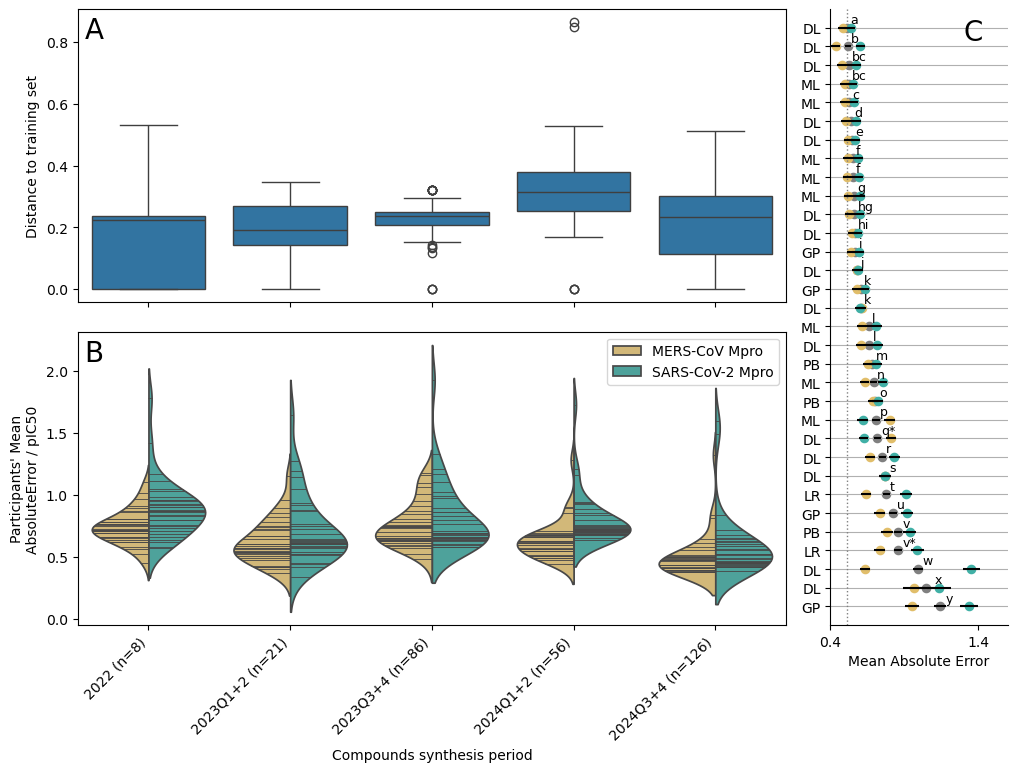

In [72]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# Define the grid layout: 2 rows (main plot), 1 column + 1 additional column for the extra plot
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 2, width_ratios=[4, 1], hspace=0.1, wspace=0.1)

# Main plots on the left
ax0 = fig.add_subplot(gs[0, 0])  # Top-left
ax1 = fig.add_subplot(gs[1, 0])  # Bottom-left

# Extra plot on the right
ax_right = fig.add_subplot(gs[:, 1])  # This spans both rows on the right

# Main boxplots



######
#### first make the bottom plot
# clean up the DF labelling a bit and plot
plotting_df["Target"] = [ "SARS-CoV-2 Mpro" if id == "sars2" else "MERS-CoV Mpro" for id in plotting_df["target id"].values]
n_2022 = len([val for val in asapid_creation_dict.values() if val == "2022"])
n_2023_12 = len([val for val in asapid_creation_dict.values() if val == "2023Q1+2"])
n_2023_34 = len([val for val in asapid_creation_dict.values() if val == "2023Q3+4"])
n_2024_12 = len([val for val in asapid_creation_dict.values() if val == "2024Q1+2"])
n_2024_34 = len([val for val in asapid_creation_dict.values() if val == "2024Q3+4"])

palette = ["#E1BE6A", "#40B0A6"]
sns.violinplot(x="created bin", y="MAE", hue="Target",
                    data=plotting_df, 
                    palette=sns.color_palette(palette, len(palette)), 
                    split=True,
                    scale="count", 
                    inner="stick",
                    scale_hue=False,
                    ax=ax1
                    )
ax1.set_xticks([0, 1, 2, 3, 4], 
              [f"2022 (n={n_2022})", f"2023Q1+2 (n={n_2023_12})", f"2023Q3+4 (n={n_2023_34})", f"2024Q1+2 (n={n_2024_12})", f"2024Q3+4 (n={n_2024_34})"],
              rotation=45, ha="right")

ax1.set_xlabel(r"Compounds synthesis period")
ax1.set_ylabel("Participants' Mean\nAbsoluteError / pIC50")

handles, labels = ax1.get_legend_handles_labels() # remove the legend title
ax1.legend(handles=handles[0:], labels=labels[0:])
# #####
# plotting_df["Target"] = [ "SARS-CoV-2 Mpro" if id == "sars2" else "MERS-CoV Mpro" for id in plotting_df["target id"].values]
# n_2023_12 = len([val for val in asapid_creation_dict.values() if val == "2023Q1+2"])
# n_2023_34 = len([val for val in asapid_creation_dict.values() if val == "2023Q3+4"])
# n_2024_12 = len([val for val in asapid_creation_dict.values() if val == "2024Q1+2"])
# n_2024_34 = len([val for val in asapid_creation_dict.values() if val == "2024Q3+4"])

# sns.violinplot(x="created bin", y="MAE", hue="Target",
#                     data=plotting_df, 
#                     palette=["#E1BE6A", "#40B0A6"], 
#                     split=True,
#                     scale="count", 
#                     inner="stick",
#                     scale_hue=False,
#                     ax=ax1
#                     )
# ax1.set_xticks([0, 1, 2, 3], 
#               [f"2023Q1+2 (n={n_2023_12})", f"2023Q3+4 (n={n_2023_34})", f"2024Q1+2 (n={n_2024_12})", f"2024Q3+4 (n={n_2024_34})"],
#               rotation=0)

# ax1.set_xlabel(r"Compounds' synthesis period")
# ax1.set_ylabel(r"Mean Absolute Error / pIC50")

# handles, labels = ax0.get_legend_handles_labels() # remove the legend title
# ax1.legend(handles=handles[0:], labels=labels[0:])


# add the success rate ranking plot to the right
# sars
sars_tick_positions = []
sars_tick_labels = []
metric = "mean_absolute_error"
mers_board = leaderboards["pIC50 (MERS-CoV Mpro)"]
sars_board = leaderboards["pIC50 (SARS-CoV-2 Mpro)"]
# order by the main score pull out the split data based on this
for i,  (_, entry) in enumerate(leaderboards["aggregated"].iterrows()):
    ax_right.scatter(entry[metric + "_raw"], i, s=35, color="grey")
    ax_right.errorbar(entry[metric + "_raw"], i, xerr=entry[metric + "_std"], ls="none", color="k", zorder=5)
    # pull the mers details
    mers_data = mers_board[mers_board["Method"] == entry["Method"]].iloc[0]
    ax_right.scatter(mers_data[metric + "_raw"], i, s=35, color="#E1BE6A")
    ax_right.errorbar(mers_data[metric + "_raw"], i, xerr=mers_data[metric + "_std"], ls="none", color="k", zorder=5)
    # sars
    sars_data = sars_board[sars_board["Method"] == entry["Method"]].iloc[0]
    ax_right.scatter(sars_data[metric + "_raw"], i, s=35, color="#40B0A6")
    ax_right.errorbar(sars_data[metric + "_raw"], i, xerr=sars_data[metric + "_std"], ls="none", color="k", zorder=5)

    label = entry["CLD"]
    if entry["Method"] in BASELINE_ENTRYS:
        label += "*"
    ax_right.annotate(label,  xy=(entry[metric + "_raw"] + entry[metric + "_std"], i-0.25), size=9)

    # add in the methodology
    sars_tick_positions.append(i)
    sars_tick_labels.append(entry_categories[entry["Method"]])

# add the sars and mers data to the top left of the plot
# ax0.scatter(min_dist[sorted_index], sars_mae, color="#40B0A6", label="SARS-CoV-2 Mpro")
# # ax0.fill_between(, sars_mae - sars_std, sars_mae + sars_std, color="#40B0A6", alpha=0.2)
# ax0.scatter(min_dist[sorted_index], mers_mae, color="#E1BE6A", label="MERS-CoV Mpro", alpha=0.8)
# # ax0.fill_between(np.arange(0, len(mers_mae)), mers_mae - mers_std, mers_mae + mers_std, color="#E1BE6A", alpha=0.2)
# # ax0.set_xlim((0, 297))
# ax0.set_ylabel("Mean Absolute Error / pIC50")
# ax0.set_xlabel("Ligand tanimoto distance to training set")

sns.boxplot(x="date", y="distance",
                    data=sim_data, 
                    # palette=["#E1BE6A", "#40B0A6"], 
                    # split=True,
                    # scale="count", 
                    # inner="stick",
                    # scale_hue=False,
                    ax=ax0
                    )
ax0.set_ylabel("Distance to training set")
ax0.set_xlabel("")
ax0.axes.xaxis.set_ticklabels([])
# ax0.set_xticks([0, 1, 2, 3], 
#               [f"2023Q1+2 (n={n_2023_12})", f"2023Q3+4 (n={n_2023_34})", f"2024Q1+2 (n={n_2024_12})", f"2024Q3+4 (n={n_2024_34})"],
            #   rotation=0)

ax_right.axvline(leaderboards["aggregated"].iloc[0]["mean_absolute_error_raw"], color='gray', linestyle=':', linewidth=1)
ax_right.set_yticks(sars_tick_positions, sars_tick_labels)
ax_right.set_ylim(-1, 32)
ax_right.set_xlim((0.4, 1.6))
ax_right.set_xticks(np.arange(0.4, 1.6))
ax_right.set_xlabel("Mean Absolute Error")


ax_right.yaxis.grid(True)

ax_right.invert_yaxis()

# add A/B/C notations to panels
ax0.annotate("A", xy=(0.01, 0.9), xycoords="axes fraction", size=20)
ax1.annotate("B", xy=(0.01, 0.9), xycoords="axes fraction", size=20)
ax_right.annotate("C", xy=(0.75, 0.95), xycoords="axes fraction", size=20)

sns.despine(ax=ax_right)
plt.tight_layout()
plt.savefig("potency_leaderboards_and_progressions.png", bbox_inches="tight", dpi=300)
plt.show()


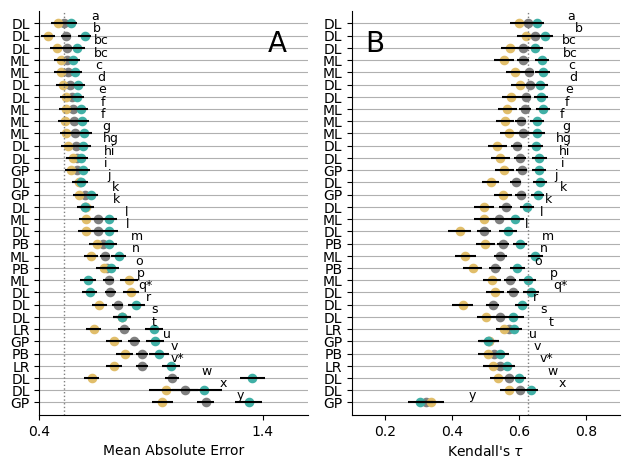

In [93]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns


f, axes = plt.subplots(1, 2)

ax_left = axes[0]
ax_right=axes[1]

# add the mae plot to the left
# sars
sars_tick_positions = []
sars_tick_labels = []
metric = "mean_absolute_error"
mers_board = leaderboards["pIC50 (MERS-CoV Mpro)"]
sars_board = leaderboards["pIC50 (SARS-CoV-2 Mpro)"]
# order by the main score pull out the split data based on this
for i,  (_, entry) in enumerate(leaderboards["aggregated"].iterrows()):
    ax_left.scatter(entry[metric + "_raw"], i, s=35, color="grey")
    ax_left.errorbar(entry[metric + "_raw"], i, xerr=entry[metric + "_std"], ls="none", color="k", zorder=5)
    # pull the mers details
    mers_data = mers_board[mers_board["Method"] == entry["Method"]].iloc[0]
    ax_left.scatter(mers_data[metric + "_raw"], i, s=35, color="#E1BE6A")
    ax_left.errorbar(mers_data[metric + "_raw"], i, xerr=mers_data[metric + "_std"], ls="none", color="k", zorder=5)
    # sars
    sars_data = sars_board[sars_board["Method"] == entry["Method"]].iloc[0]
    ax_left.scatter(sars_data[metric + "_raw"], i, s=35, color="#40B0A6")
    ax_left.errorbar(sars_data[metric + "_raw"], i, xerr=sars_data[metric + "_std"], ls="none", color="k", zorder=5)

    label = entry["CLD"]
    if entry["Method"] in BASELINE_ENTRYS:
        label += "*"
    ax_left.annotate(label,  xy=(entry[metric + "_raw"]+0.1 + entry[metric + "_std"], i-0.3), size=9)

    # add in the methodology
    sars_tick_positions.append(i)
    sars_tick_labels.append(entry_categories[entry["Method"]])


ax_left.axvline(leaderboards["aggregated"].iloc[0]["mean_absolute_error_raw"], color='gray', linestyle=':', linewidth=1)
ax_left.set_yticks(sars_tick_positions, sars_tick_labels)
ax_left.set_ylim(-1, 32)
ax_left.set_xlim((0.4, 1.6))
ax_left.set_xticks(np.arange(0.4, 1.6))
ax_left.set_xlabel("Mean Absolute Error")


ax_left.yaxis.grid(True)

ax_left.invert_yaxis()

# add the ktau plot to the right
# sars
sars_tick_positions = []
sars_tick_labels = []
metric = "kendall_tau"
mers_board = leaderboards["pIC50 (MERS-CoV Mpro)"]
sars_board = leaderboards["pIC50 (SARS-CoV-2 Mpro)"]
# order by the main score pull out the split data based on this
for i,  (_, entry) in enumerate(leaderboards["aggregated"].iterrows()):
    ax_right.scatter(entry[metric + "_raw"], i, s=35, color="grey")
    ax_right.errorbar(entry[metric + "_raw"], i, xerr=entry[metric + "_std"], ls="none", color="k", zorder=5)
    # pull the mers details
    mers_data = mers_board[mers_board["Method"] == entry["Method"]].iloc[0]
    ax_right.scatter(mers_data[metric + "_raw"], i, s=35, color="#E1BE6A")
    ax_right.errorbar(mers_data[metric + "_raw"], i, xerr=mers_data[metric + "_std"], ls="none", color="k", zorder=5)
    # sars
    sars_data = sars_board[sars_board["Method"] == entry["Method"]].iloc[0]
    ax_right.scatter(sars_data[metric + "_raw"], i, s=35, color="#40B0A6")
    ax_right.errorbar(sars_data[metric + "_raw"], i, xerr=sars_data[metric + "_std"], ls="none", color="k", zorder=5)

    label = entry["CLD"]
    if entry["Method"] in BASELINE_ENTRYS:
        label += "*"
    ax_right.annotate(label,  xy=(entry[metric + "_raw"]+0.1 + entry[metric + "_std"], i-0.3), size=9)

    # add in the methodology
    sars_tick_positions.append(i)
    sars_tick_labels.append(entry_categories[entry["Method"]])


ax_right.axvline(leaderboards["aggregated"].iloc[0]["kendall_tau_raw"], color='gray', linestyle=':', linewidth=1)
ax_right.set_yticks(sars_tick_positions, sars_tick_labels)
ax_right.set_ylim(-1, 32)
ax_right.set_xlim((0.1, 0.9))
# ax_right.set_xticks(np.arange(0.1, 0.5, 0.8))
ax_right.set_xlabel(r"Kendall's $\tau$")


ax_right.yaxis.grid(True)

ax_right.invert_yaxis()

# add A/B/C notations to panels
ax_left.annotate("A", xy=(0.85, 0.9), xycoords="axes fraction", size=20)
ax_right.annotate("B", xy=(0.05, 0.9), xycoords="axes fraction", size=20)

sns.despine(ax=ax_left)
sns.despine(ax=ax_right)

plt.tight_layout()
plt.savefig("SI_potency_leaderboards.png", bbox_inches="tight", dpi=300)
plt.show()
